In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

In [3]:
data = pd.read_csv("../data/crabs.csv") 
data.head(10)

Unnamed: 0 sp sex  index    FL    RW    CL    CW    BD
0           1  B   M      1   8.1   6.7  16.1  19.0   7.0
1           2  B   M      2   8.8   7.7  18.1  20.8   7.4
2           3  B   M      3   9.2   7.8  19.0  22.4   7.7
3           4  B   M      4   9.6   7.9  20.1  23.1   8.2
4           5  B   M      5   9.8   8.0  20.3  23.0   8.2
5           6  B   M      6  10.8   9.0  23.0  26.5   9.8
6           7  B   M      7  11.1   9.9  23.8  27.1   9.8
7           8  B   M      8  11.6   9.1  24.5  28.4  10.4
8           9  B   M      9  11.8   9.6  24.2  27.8   9.7
9          10  B   M     10  11.8  10.5  25.2  29.3  10.3

In [4]:
data.describe()

Unnamed: 0       index          FL         RW          CL          CW  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean   100.500000   25.500000   15.583000   12.73850   32.105500   36.414500   
std     57.879185   14.467083    3.495325    2.57334    7.118983    7.871955   
min      1.000000    1.000000    7.200000    6.50000   14.700000   17.100000   
25%     50.750000   13.000000   12.900000   11.00000   27.275000   31.500000   
50%    100.500000   25.500000   15.550000   12.80000   32.100000   36.800000   
75%    150.250000   38.000000   18.050000   14.30000   37.225000   42.000000   
max    200.000000   50.000000   23.100000   20.20000   47.600000   54.600000   

               BD  
count  200.000000  
mean    14.030500  
std      3.424772  
min      6.100000  
25%     11.400000  
50%     13.900000  
75%     16.600000  
max     21.600000

In [6]:
x=data.iloc[:,3:9].values
x

array([[ 1. ,  8.1,  6.7, 16.1, 19. ,  7. ],
       [ 2. ,  8.8,  7.7, 18.1, 20.8,  7.4],
       [ 3. ,  9.2,  7.8, 19. , 22.4,  7.7],
       ...,
       [48. , 21.9, 17.2, 42.6, 47.4, 19.5],
       [49. , 22.5, 17.2, 43. , 48.7, 19.8],
       [50. , 23.1, 20.2, 46.2, 52.5, 21.1]])

In [8]:
y=data.iloc[:,1].values
y

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

In [9]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

array([[-1.69774938, -2.14623182, -2.35244988, -2.25392649, -2.2177718 ,
        -2.05798865],
       [-1.62845348, -1.94546178, -1.96287468, -1.97228249, -1.98853816,
        -1.94089947],
       [-1.55915759, -1.83073603, -1.92391716, -1.8455427 , -1.78477492,
        -1.85308259],
       ...,
       [ 1.55915759,  1.81180629,  1.73808978,  1.47785646,  1.39902565,
         1.60104813],
       [ 1.62845348,  1.9838949 ,  1.73808978,  1.53418526,  1.56458328,
         1.68886502],
       [ 1.69774938,  2.15598351,  2.9068154 ,  1.98481565,  2.04852096,
         2.06940484]])

In [10]:
print("La moyenne : ",np.mean(x,axis=0))
print("L'écart type : ",np.std(x,axis=0))

La moyenne :  [-1.33226763e-17 -7.10542736e-17  6.03961325e-16  1.06581410e-16
 -4.97379915e-16  0.00000000e+00]
L'écart type :  [1. 1. 1. 1. 1. 1.]


In [11]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)

In [13]:
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         5.199105         0.341983
1         4.673593         0.209724

In [15]:
finaldf = pd.concat([principaldf, data[['sp']]], axis = 1)
finaldf.head(10)

Axe principal 1  Axe principal 2 sp
0         5.199105         0.341983  B
1         4.673593         0.209724  B
2         4.409200         0.212084  B
3         4.156714         0.185426  B
4         4.084025         0.212705  B
5         3.246055        -0.030552  B
6         2.966264        -0.091915  B
7         2.819430        -0.030643  B
8         2.826148         0.008196  B
9         2.449721        -0.065115  B

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

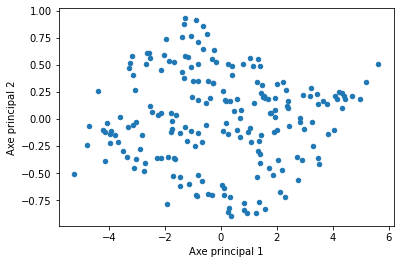

In [16]:
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

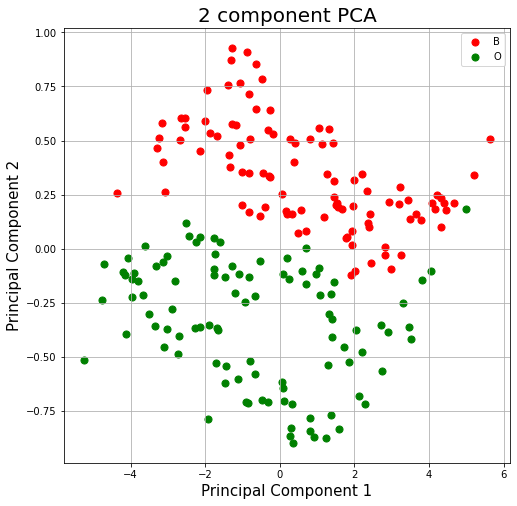

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'O']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf['sp'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
pca.explained_variance_ratio_

array([0.93810463, 0.03022916])